## 🚀 Python Lab: ANN with Dropout (TensorFlow/Keras Version)
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 9 - May 25, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week09/01_ANN_Dropout_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week09/01_ANN_Dropout_Keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
gpus = tf.config.list_physical_devices('GPU')
print("GPU name:", gpus)
print("Num GPUs Available:", len(gpus))

GPU name: []
Num GPUs Available: 0


## 1️⃣ Load Data

In [6]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [7]:
dataset = df.values
X = dataset[:,0:10]
y = dataset[:,10]

In [8]:
# Normalize features
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
# Split data
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

## 2️⃣ Model#1: Baseline

In [10]:
model = Sequential([
    Input(shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
], name='Model1')

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

`pip install pydot`

`pip install pydotplus`

`pip install graphviz`

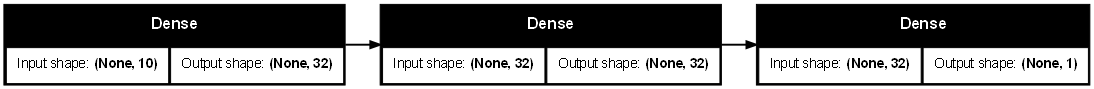

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR', dpi=70)

In [13]:
model.summary()

Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train
hist = model.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val), verbose=0)

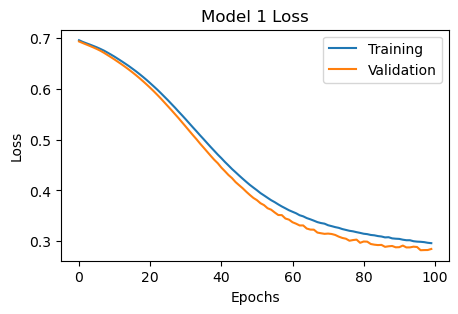

In [16]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('01_ANN_Model1_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

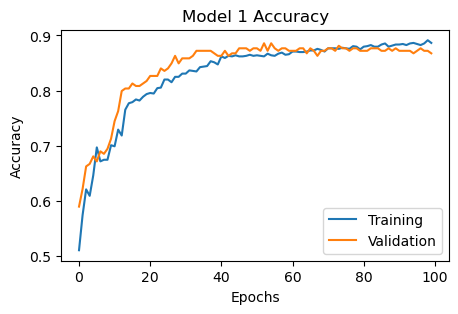

In [17]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('01_ANN_Model1_acc.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 3️⃣ Model#2

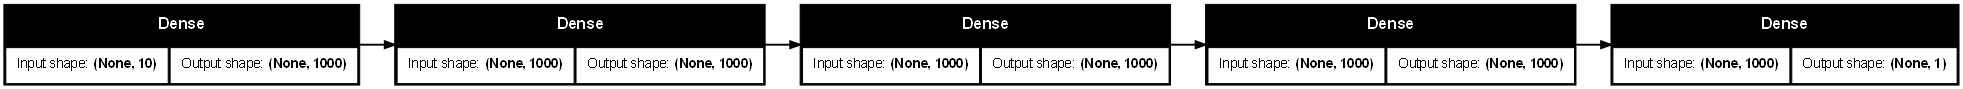

In [19]:
model_2 = Sequential([
    Input(shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
], name='Model2')

model_2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

tf.keras.utils.plot_model(model_2, show_shapes=True, rankdir='LR', dpi=70)

In [20]:
model_2.summary()

Model: "Model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1000)                │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,015,001 (11.50 MB)

 Trainable params: 3,015,001 (11.50 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist2 = model_2.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val), verbose=0)

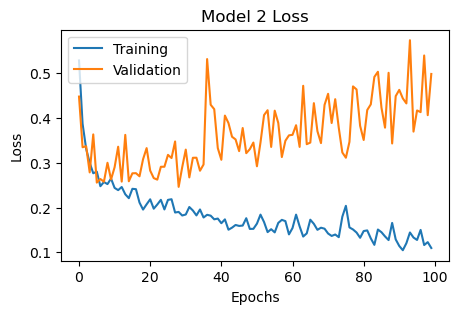

In [22]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist2.history['loss'], label='Training')
plt.plot(hist2.history['val_loss'], label='Validation')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('01_ANN_Model2_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

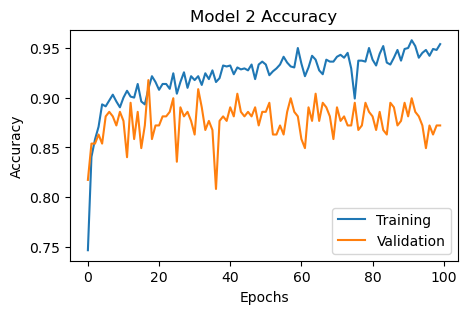

In [23]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist2.history['accuracy'], label='Training')
plt.plot(hist2.history['val_accuracy'], label='Validation')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('01_ANN_Model2_acc.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 4️⃣ Model#3: Dropout

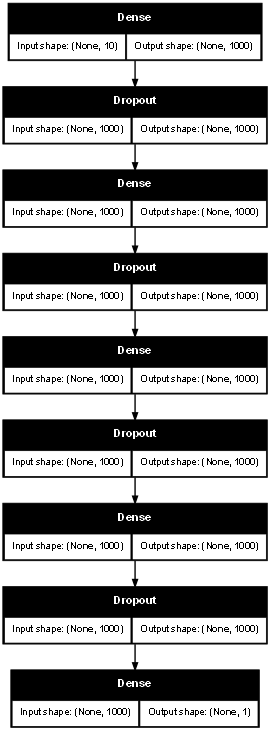

In [25]:
model_3 = Sequential([
    Input(shape=(10,)),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
], name='Model3')

model_3.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

tf.keras.utils.plot_model(model_3, show_shapes=True, dpi=50)

In [26]:
model_3.summary()

Model: "Model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1000)                │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,015,001 (11.50 MB)

 Trainable params: 3,015,001 (11.50 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
hist3 = model_3.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val), verbose=0)

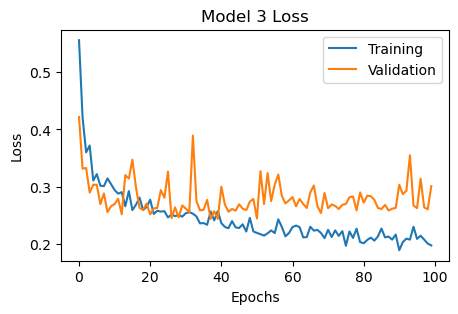

In [28]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist3.history['loss'], label='Training')
plt.plot(hist3.history['val_loss'], label='Validation')
plt.title('Model 3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('01_ANN_Model3_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

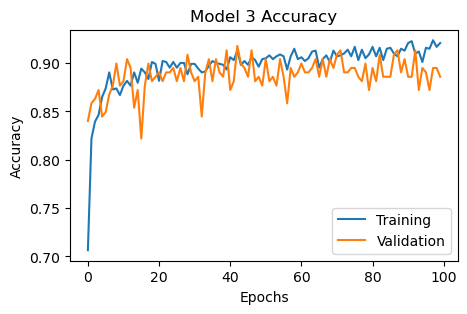

In [29]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist3.history['accuracy'], label='Training')
plt.plot(hist3.history['val_accuracy'], label='Validation')
plt.title('Model 3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('01_ANN_Model3_acc.pdf', format='pdf', bbox_inches='tight')
plt.show()